## Testing probes


In [1]:
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.polynomial import polynomial as P
import pandas as pd
import seaborn as sns
import scipy.io as sio
import warnings
warnings.filterwarnings("ignore")

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
densities = np.array([0.99707, 1.01072, 1.01613, 1.02175, 1.03054, 1.04765])

../probe_testing_15nov19/sample1.mat
../probe_testing_15nov19/sample2.mat
../probe_testing_15nov19/sample3.mat
../probe_testing_15nov19/sample4.mat
../probe_testing_15nov19/sample5.mat
../probe_testing_15nov19/sample6.mat


Text(0.5,1,'CH2 - downstream ')

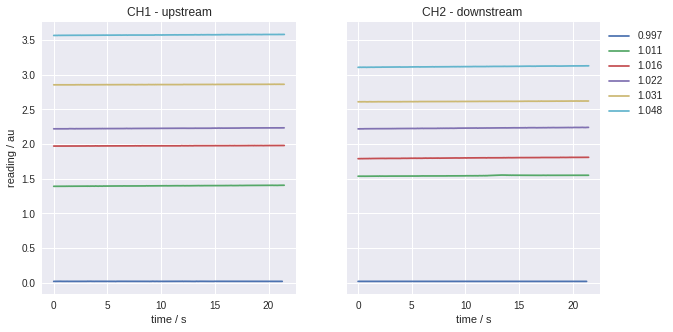

In [6]:
nums = ['1','2','3','4','5','6']
file_num = len(nums)

mean_read_ch1 = np.zeros(file_num)
std_read_ch1 = np.zeros(file_num)

mean_read_ch2 = np.zeros(file_num)
std_read_ch2 = np.zeros(file_num)

fig, (ax0, ax1) = plt.subplots(1,2, figsize=(10,5), sharey=True)

for num, ii in zip(nums, range(file_num)):
    filepath = '../probe_testing_15nov19/sample%s.mat' %num
    print(filepath)
    mat = sio.loadmat(filepath, squeeze_me=True)
    ch1 = mat['ch1']
    ch2 = mat['ch2']
    time = mat['time']
    nsamples = mat['nSamples']
    
    mean_read_ch1[ii] = np.mean(ch1)
    std_read_ch1[ii] = np.std(ch1)
    
    mean_read_ch2[ii] = np.mean(ch2)
    std_read_ch2[ii] = np.std(ch2)
 
    ax0.plot(time,ch1)
    ax1.plot(time,ch2, label='%1.3f' %densities[ii])
    
ax1.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('reading / au')
ax0.set_xlabel('time / s')
ax1.set_xlabel('time / s')
ax0.set_title('CH1 - upstream')
ax1.set_title('CH2 - downstream ')